In [8]:
import numpy as np
import csv
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [10]:
data_filename = "ionosphere.data"
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [13]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [16]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarn

In [17]:
%matplotlib inline

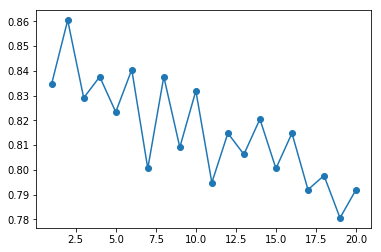

In [18]:
from matplotlib import pyplot as plt
plt.plot(parameter_values, avg_scores, '-o')

In [19]:
X_broken = np.array(X)

In [20]:
X_broken[:,::2] /= 10

In [21]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy')
print("The original average accuracy is {0:.1f}%".format(np.mean(original_scores)*100))
broken_scores = cross_val_score(estimator, X_broken, y, scoring='accuracy')
print("The broken average accuracy is {0:.1f}%".format(np.mean(broken_scores)*100))

The original average accuracy is 82.3%
The broken average accuracy is 71.5%


C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print("The transformed average accracy is {0:.1f}%".format(np.mean(transformed_scores)*100))

The transformed average accracy is 82.3%


C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [25]:
from sklearn.pipeline import Pipeline
scaling_pipline = Pipeline([('scale', MinMaxScaler()), ('predict', KNeighborsClassifier())])

In [26]:
scores = cross_val_score(scaling_pipline, X_broken, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores)*100))

The pipeline scored an average accuracy for is 82.3%


C:\Users\quekai\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
